In [1]:
from pathlib import Path

import skimage
from skimage.transform import resize
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from skimage.filters import laplace
import os
%matplotlib inline

In [28]:
def laplace_multiplicand(fileID, band):
    fires = np.load(fileID);
    height, width = fires.shape
    smallFires = resize(fires, (round(height/2), round(width/2)))
    blurryFires = resize(smallFires, (height, width))
    laplace_edges = laplace(blurryFires)
    
    table = []
    n = 0
    while n <= 1:
        sharped_image = blurryFires + laplace_edges*n
        mean = abs(fires-sharped_image).mean()
        rmse = np.sqrt(((sharped_image-fires)**2)).mean()
        table.append({'Filename': fileID,'Band': band,'Multiplicand': n, 'Mean Error': mean, 'RMSE': rmse})
        n += .1
    
    return pd.DataFrame(table)

In [26]:
laplace_multiplicand('../GOES_Files/test_files/difference.npy','07')

,Filename,Band,Multiplicand,Mean Error,RMSE
0,../GOES_Files/test_files/difference.npy,07,0.0,0.670047,0.670047
1,../GOES_Files/test_files/difference.npy,07,0.1,0.638495,0.638495
2,../GOES_Files/test_files/difference.npy,07,0.2,0.610026,0.610026
3,../GOES_Files/test_files/difference.npy,07,0.3,0.585104,0.585104
4,../GOES_Files/test_files/difference.npy,07,0.4,0.564272,0.564272
5,../GOES_Files/test_files/difference.npy,07,0.5,0.548113,0.548113
6,../GOES_Files/test_files/difference.npy,07,0.6,0.537101,0.537101
7,../GOES_Files/test_files/difference.npy,07,0.7,0.531583,0.531583
8,../GOES_Files/test_files/difference.npy,07,0.8,0.531663,0.531663
9,../GOES_Files/test_files/difference.npy,07,0.9,0.537360,0.537360


In [2]:
def laplace_files(path):
    df = pd.DataFrame(columns=['Band', 'Mean Error', 'RMSE'])
    for file in os.listdir(path):
        fires = np.load(path + file)
        band = file[19:21]
        
        height, width = fires.shape
        smallFires = resize(fires, (round(height/2), round(width/2)))
        blurryFires = resize(smallFires, (height, width))
        laplace_edges = laplace(blurryFires)

        sharped_image = blurryFires + laplace_edges
        error = abs(fires-sharped_image).mean()
        df['Mean Error'].append(error)
        rmse = np.sqrt(((sharped_image-fires)**2)).mean()
        df['RMSE'].append(rmse)
        
    table.append({'Filename': file,'Band': band, 'Mean Error': error, 'RMSE': rmse})
    #calculate values for each band
    #append dataframes
    return df

In [3]:
laplace_files('../GOES_Files/npy_files/')

TypeError: cannot concatenate object of type '<class 'numpy.float32'>'; only Series and DataFrame objs are valid

In [4]:
df

NameError: name 'df' is not defined

In [4]:
# creates a table out of all the c14 files
dfc14 = pd.concat((laplace_multiplicand(file, '14') for file in Path('TIFF_Files/CampFire/').glob('GOES-17_ABI_RadC_C14*')))

In [5]:
#creates a table out of all the c07 files
dfc07 = pd.concat((laplace_multiplicand(file, '07') for file in Path('TIFF_Files/CampFire/').glob('GOES-17_ABI_RadC_C07*')))

In [6]:
df_all = pd.concat([dfc14, dfc07])

In [7]:
df_all

,Filename,Band,Multiplicand,Mean Error,Square Root
0,TIFF_Files/CampFire/GOES-17_ABI_RadC_C14_20181...,14,0.0,1.993900,2.937043
1,TIFF_Files/CampFire/GOES-17_ABI_RadC_C14_20181...,14,0.1,1.934093,2.832672
2,TIFF_Files/CampFire/GOES-17_ABI_RadC_C14_20181...,14,0.2,1.883747,2.745723
3,TIFF_Files/CampFire/GOES-17_ABI_RadC_C14_20181...,14,0.3,1.844548,2.677895
4,TIFF_Files/CampFire/GOES-17_ABI_RadC_C14_20181...,14,0.4,1.817810,2.630667
...,...,...,...,...,...
6,TIFF_Files/CampFire/GOES-17_ABI_RadC_C07_20181...,07,0.6,1.414960,1.872903
7,TIFF_Files/CampFire/GOES-17_ABI_RadC_C07_20181...,07,0.7,1.417593,1.872865
8,TIFF_Files/CampFire/GOES-17_ABI_RadC_C07_20181...,07,0.8,1.428059,1.885348
9,TIFF_Files/CampFire/GOES-17_ABI_RadC_C07_20181...,07,0.9,1.445897,1.910108


In [12]:
#the correct dataframe!!
df = df_all
df.groupby(['Band', 'Multiplicand']).mean().reset_index()

,Band,Multiplicand,Mean Error,Square Root
0,07,0.0,1.654863,2.291633
1,07,0.1,1.608058,2.214689
2,07,0.2,1.568417,2.149217
3,07,0.3,1.536881,2.096297
4,07,0.4,1.514199,2.056904
5,07,0.5,1.500714,2.031828
6,07,0.6,1.496526,2.021605
7,07,0.7,1.501503,2.026458
8,07,0.8,1.515250,2.046277
9,07,0.9,1.537186,2.080628


In [14]:
df7 = (df[df["Band"]=="07"])
df14 = df[df["Band"]=="14"]

,Filename,Band,Multiplicand,Mean Error,Square Root
0,TIFF_Files/CampFire/GOES-17_ABI_RadC_C14_20181...,14,0.0,1.993900,2.937043
1,TIFF_Files/CampFire/GOES-17_ABI_RadC_C14_20181...,14,0.1,1.934093,2.832672
2,TIFF_Files/CampFire/GOES-17_ABI_RadC_C14_20181...,14,0.2,1.883747,2.745723
3,TIFF_Files/CampFire/GOES-17_ABI_RadC_C14_20181...,14,0.3,1.844548,2.677895
4,TIFF_Files/CampFire/GOES-17_ABI_RadC_C14_20181...,14,0.4,1.817810,2.630667
...,...,...,...,...,...
6,TIFF_Files/CampFire/GOES-17_ABI_RadC_C14_20181...,14,0.6,2.011036,2.972018
7,TIFF_Files/CampFire/GOES-17_ABI_RadC_C14_20181...,14,0.7,2.022125,2.987309
8,TIFF_Files/CampFire/GOES-17_ABI_RadC_C14_20181...,14,0.8,2.048889,3.029620
9,TIFF_Files/CampFire/GOES-17_ABI_RadC_C14_20181...,14,0.9,2.090102,3.097842


Text(0, 0.5, 'Mean Error')

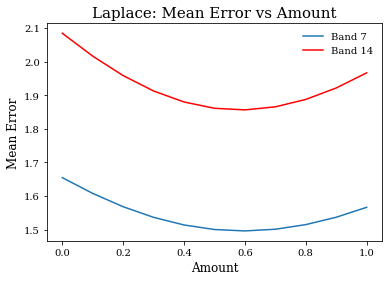

In [70]:
ax = df7.groupby(['Multiplicand']).mean().reset_index().plot('Multiplicand','Mean Error')
df14.groupby(['Multiplicand']).mean().reset_index().plot('Multiplicand','Mean Error',color = 'red',ax = ax)
plt.xlabel("Amount",fontname = 'serif',fontsize = 12)
plt.title('Laplace: Mean Error vs Amount',fontsize = 15,fontname = 'serif')
plt.legend(['Band 7','Band 14'],frameon = False)
plt.rc('font',family='serif')
plt.ylabel('Mean Error',fontname = 'serif',fontsize = 12)